# Linear Regression

Chapter 4 in 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition' (Geron) would help if you need more advaned treat.

$Y = \beta_0 + \beta_1 x_1+\cdots+\beta_p x_p +\epsilon$

Thus far, we described: estimate $\beta$'s using data. In a similar manner, we also decribe this as: we trained the model using the data; find a parameter to fit the trining sets.  $\beta_0$ is called the bias term which is also knwon as the intercpet.

## Now let's look at the textbook example

In [4]:
%matplotlib inline
from preamble import *

w[0]: 0.393906  b: -0.031804


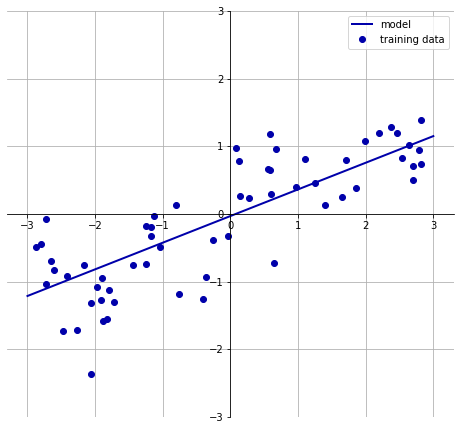

In [5]:
mglearn.plots.plot_linear_regression_wave()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675976


In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/Users/yeabinmoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [10]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# Let's review the codes above.

You need to understand what this mglearn.datasets.make_wave() calls for. How?

Ok. Now you understood it is nothing but a simulated data.

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=1000) # produce more data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.453]
lr.intercept_: 0.04435654574547011
Training set score: 0.63
Test set score: 0.59


## How do we get the estimates?

The first method is to use a closed-form solution. That is, there is a unique solution $\beta$'s minimizes RSS. You may see $\hat{\beta}=(X'X)^{-1}X'y$. This is called the normal equation.

In [12]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np

X_b = add_dummy_feature(X_train)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

What's the purpose of add_dummy_feature()?

In [13]:
theta_best

array([0.044, 0.453])

Now using the test set, predict y

In [14]:
X_new_b = add_dummy_feature(X_test)
y_predict = X_new_b @ theta_best
y_predict

array([ 0.921, -1.166, -0.162, -0.782,  1.172, -0.614, -0.934,  1.362,
       -0.889, -0.812,  1.365,  0.037,  0.225,  0.359,  1.232, -0.397,
        1.152, -1.157, -0.855,  0.272, -0.4  , -1.197, -0.792, -0.473,
       -1.04 ,  0.151, -0.693,  0.531, -0.902, -1.121,  0.29 , -0.977,
       -0.683, -0.054, -0.445,  0.075, -0.34 , -0.822, -0.989,  1.06 ,
        0.436, -0.158, -0.99 ,  0.415,  0.781,  1.204, -0.642,  0.031,
        1.149, -1.066, -0.195,  1.31 , -0.289,  0.883, -1.175,  0.024,
       -0.829, -0.233, -1.191,  0.199, -0.437,  0.44 ,  1.215, -0.339,
       -0.408, -0.976,  1.3  ,  0.292, -1.161,  0.112,  0.538, -1.041,
        1.278, -0.53 , -0.041,  0.16 ,  1.124,  0.263,  0.745, -0.583,
        0.199,  0.717,  0.371,  0.135,  0.493, -0.575,  0.271,  1.297,
        0.376, -0.571, -0.141, -0.657,  0.888,  0.096,  0.403,  1.123,
        0.371, -0.375,  0.235,  1.364, -1.204, -0.737, -0.586,  0.512,
       -0.361,  0.146,  0.595, -0.09 , -0.551, -0.754,  0.107,  1.154,
      

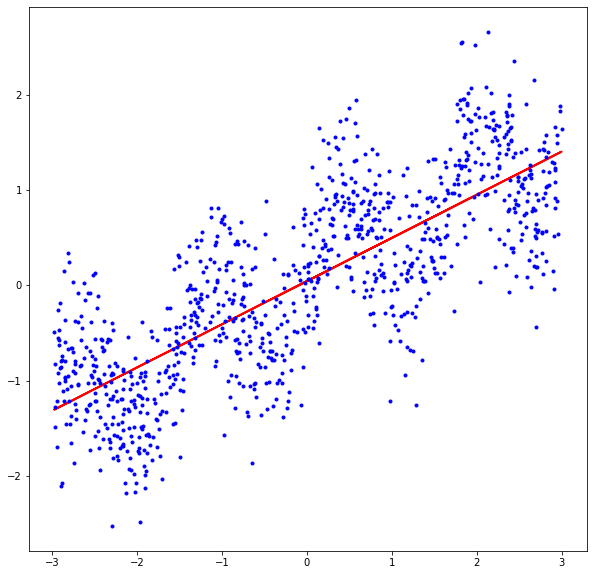

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(X_test, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

Performing linear regression using Scikit-Learn is relatively straightforward

In [16]:
lr = LinearRegression().fit(X_train, y_train)
lr.predict(X_test)

array([ 0.921, -1.166, -0.162, -0.782,  1.172, -0.614, -0.934,  1.362,
       -0.889, -0.812,  1.365,  0.037,  0.225,  0.359,  1.232, -0.397,
        1.152, -1.157, -0.855,  0.272, -0.4  , -1.197, -0.792, -0.473,
       -1.04 ,  0.151, -0.693,  0.531, -0.902, -1.121,  0.29 , -0.977,
       -0.683, -0.054, -0.445,  0.075, -0.34 , -0.822, -0.989,  1.06 ,
        0.436, -0.158, -0.99 ,  0.415,  0.781,  1.204, -0.642,  0.031,
        1.149, -1.066, -0.195,  1.31 , -0.289,  0.883, -1.175,  0.024,
       -0.829, -0.233, -1.191,  0.199, -0.437,  0.44 ,  1.215, -0.339,
       -0.408, -0.976,  1.3  ,  0.292, -1.161,  0.112,  0.538, -1.041,
        1.278, -0.53 , -0.041,  0.16 ,  1.124,  0.263,  0.745, -0.583,
        0.199,  0.717,  0.371,  0.135,  0.493, -0.575,  0.271,  1.297,
        0.376, -0.571, -0.141, -0.657,  0.888,  0.096,  0.403,  1.123,
        0.371, -0.375,  0.235,  1.364, -1.204, -0.737, -0.586,  0.512,
       -0.361,  0.146,  0.595, -0.09 , -0.551, -0.754,  0.107,  1.154,
      

In [17]:
print(lr.intercept_, lr.coef_)

0.04435654574547011 [0.453]


# Gradient descent

In [18]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

y_train.shape = (X_b @ theta).shape

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y_train)
    theta = theta - eta * gradients

In [19]:
theta

array([[0.044],
       [0.453]])

/var/folders/cb/7hzzd8c15td3tvc0mhb799hc0000gp/T/ipykernel_7009/4025838468.py:14: RuntimeWarning: invalid value encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y_train)
/var/folders/cb/7hzzd8c15td3tvc0mhb799hc0000gp/T/ipykernel_7009/4025838468.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


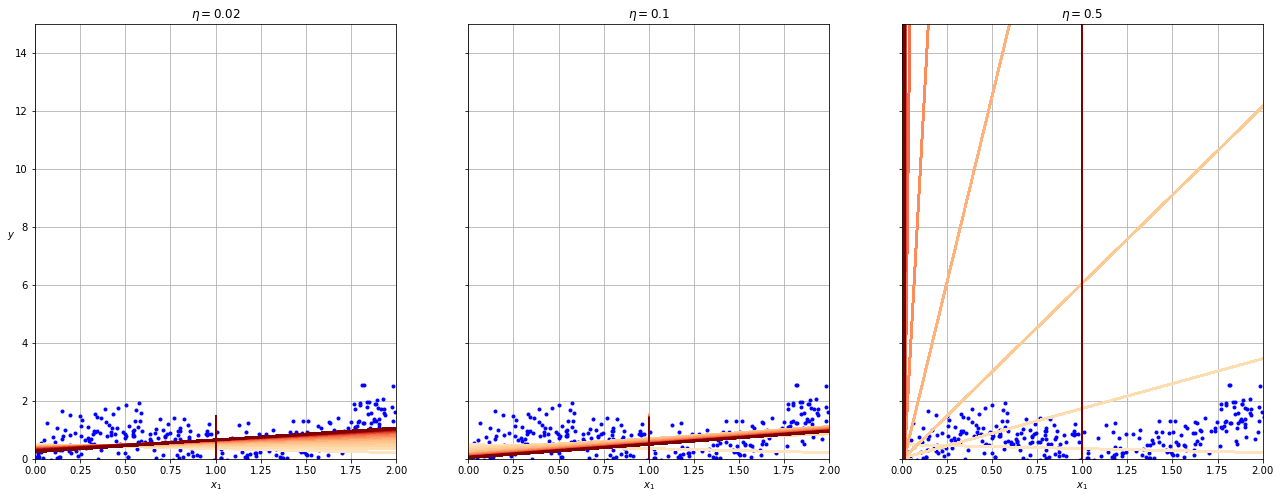

In [20]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new_b, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y_train)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(22, 8))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

# Focus on Boston Housing dataset

The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. The dataset contains 506 data points, described by 13 features. The original data 

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


/Users/yeabinmoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [22]:
boston.DESCR.split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [23]:
X = boston.data
X.shape

(506, 13)

In [24]:
y = boston.target
y.shape

(506,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ -0.118   0.044  -0.006   2.393 -15.589   3.769  -0.007  -1.435   0.24
  -0.011  -0.986   0.008  -0.499]
lr.intercept_: 36.93325545711961


In [26]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.64


# Two data sets are the same?

In [27]:
load_boston().target.mean() == mglearn.datasets.load_extended_boston()[1].mean()

/Users/yeabinmoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

True

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ -0.118   0.044  -0.006   2.393 -15.589   3.769  -0.007  -1.435   0.24
  -0.011  -0.986   0.008  -0.499]
lr.intercept_: 36.93325545711961


## How do we get the estimates?

The first method is to use a closed-form solution. That is, there is a unique solution $\beta$'s minimizes RSS. You may see $\hat{\beta}=(X'X)^{-1}X'y$. This is called the normal equation.

In [29]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np

In [30]:
X_b = add_dummy_feature(X_train) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
theta_best

array([ 36.933,  -0.118,   0.044,  -0.006,   2.393, -15.589,   3.769,
        -0.007,  -1.435,   0.24 ,  -0.011,  -0.986,   0.008,  -0.499])

In [31]:
X_new_b = add_dummy_feature(X_test)
y_predict = X_new_b @ theta_best
y_predict

array([24.952, 23.617, 29.206, 11.961, 21.334, 19.47 , 20.422, 21.52 ,
       18.99 , 19.951,  4.925, 16.097, 16.936,  5.335, 39.844, 32.335,
       22.328, 36.54 , 31.033, 23.322, 24.921, 24.261, 20.715, 30.451,
       22.45 ,  9.875, 17.703, 17.975, 35.699, 20.794, 18.106, 17.683,
       19.714, 23.797, 29.065, 19.237, 10.978, 24.562, 17.329, 15.203,
       26.093, 20.877, 22.262, 15.326, 22.858, 25.089, 19.741, 22.707,
        9.667, 24.462, 20.727, 17.525, 24.456, 30.107, 13.313, 21.521,
       20.656, 15.343, 13.774, 22.074, 17.533, 21.607, 32.911, 31.328,
       17.643, 32.699, 18.566, 19.321, 18.813, 23.044, 22.816, 23.998,
       30.627, 28.866, 25.782,  5.007, 36.834, 23.805, 27.37 , 19.331,
       28.514, 19.191, 18.817, 37.942, 39.344, 23.908, 24.96 , 15.703,
       25.921, 16.57 , 15.763, 12.892, 24.439, 30.932, 22.368, 20.176,
        0.228, 25.265, 15.354, 17.798, 25.447, 22.466, 32.579, 22.014,
       27.375, 23.313,  6.298, 14.759, 22.449, 29.112, 32.972, 12.855,
      

In [32]:
# You can use the sklearn

lr.predict(X_test)

array([24.952, 23.617, 29.206, 11.961, 21.334, 19.47 , 20.422, 21.52 ,
       18.99 , 19.951,  4.925, 16.097, 16.936,  5.335, 39.844, 32.335,
       22.328, 36.54 , 31.033, 23.322, 24.921, 24.261, 20.715, 30.451,
       22.45 ,  9.875, 17.703, 17.975, 35.699, 20.794, 18.106, 17.683,
       19.714, 23.797, 29.065, 19.237, 10.978, 24.562, 17.329, 15.203,
       26.093, 20.877, 22.262, 15.326, 22.858, 25.089, 19.741, 22.707,
        9.667, 24.462, 20.727, 17.525, 24.456, 30.107, 13.313, 21.521,
       20.656, 15.343, 13.774, 22.074, 17.533, 21.607, 32.911, 31.328,
       17.643, 32.699, 18.566, 19.321, 18.813, 23.044, 22.816, 23.998,
       30.627, 28.866, 25.782,  5.007, 36.834, 23.805, 27.37 , 19.331,
       28.514, 19.191, 18.817, 37.942, 39.344, 23.908, 24.96 , 15.703,
       25.921, 16.57 , 15.763, 12.892, 24.439, 30.932, 22.368, 20.176,
        0.228, 25.265, 15.354, 17.798, 25.447, 22.466, 32.579, 22.014,
       27.375, 23.313,  6.298, 14.759, 22.449, 29.112, 32.972, 12.855,
      

In [33]:
[lr.coef_,lr.intercept_]

[array([ -0.118,   0.044,  -0.006,   2.393, -15.589,   3.769,  -0.007,
         -1.435,   0.24 ,  -0.011,  -0.986,   0.008,  -0.499]),
 36.93325545711961]

In [34]:
X_b.shape

(379, 14)